<font size="5" color='blue'>Step 1:  Create a configuration file to list different sources used in analysis that help in calculating emission factor for sub region and marginal emission factors. </font> 
<br />
<br />
The model use below configuration as a input for analysis purpose. The key names (gppd, sentinel-5P, gfs etc.,.) can be modified as needed to match with different sources, 
<br />
 
{    <br />
	"emissionAnalyze":{<br />
		"type":"spatial",
		 .... },<br />
	"gppd":{ 
		"type":"Generator",
		.... },<br />
	"sentinel-5P":{ 
		"type":"RasterEmission",
		.... },<br />
	"gfs":{ 
		"type":"RasterWeather",
		.... },<br />
	"gldas":{ 
		"type":"RasterWeather",
		.... },<br />
}

In above config, each element describes as below.
<br />
<font size="5" color='blue'>EmissionAnalyze:</font> <br/> 
This element is used to provide input to model that explain what are the sub region analysis need to be performed during model execution. This element contains below elements to make the code execution dynamic.


{   <br />
    "emissionAnalyze":{ <br />
        "type":"spatial",<br />
        "projection":"4326",<br />
        "rasterReference":"/kaggle/input/ds4g-environmental-insights-explorer/eie_data/s5p_no2/",<br />
        "layers":[<br />
            {<br />
                "name":"County",<br />
                "type":"Landbase_subregion",<br />
                "inpath":"/kaggle/input/spatial/county.shp",<br />
                "outpath":"/kaggle/input/spatial/county.shp",<br />
                "displayField":{<br />
                    "fieldName":"NAME"<br />
                }<br />
            },<br />
            {<br />
                "name":"powerplant_50Miles",<br />
                "type":"powerplant_subregion",<br />
                "inpath":"/kaggle/working/spatial/gppd_location.shp",<br />
                "outpath":"/kaggle/working/powerplant_50Miles.shp",<br />
                //buffer distance is in miles
                // buffer distance is required if layer is point geometry
                "buffer": 50,
                "displayField":{<br />
                    "fieldName":"name"<br />
                }<br />
            }<br />
}
<br />


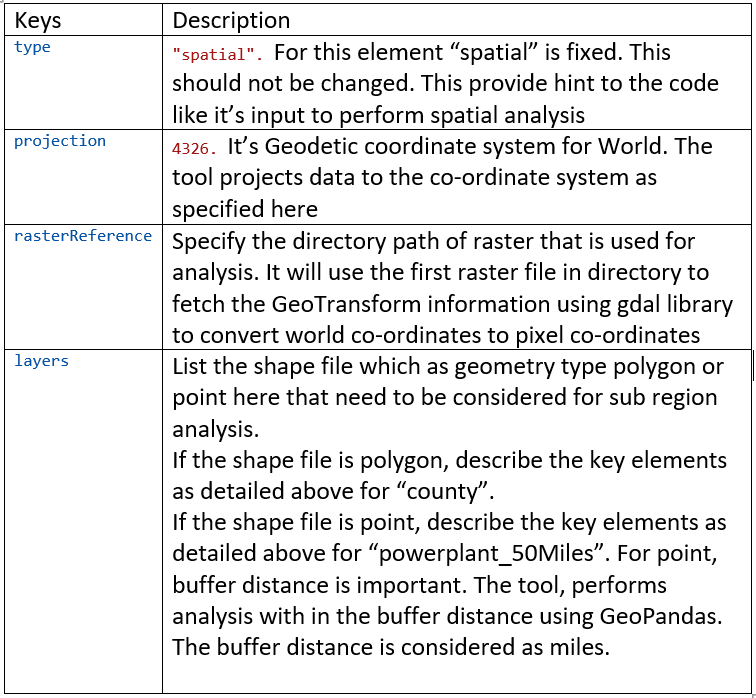

<font size="5" color='blue'>GPPD </font> <br />
	This element is used to provide input to model that explain what are the power plant locations that need to be considered for analysis. This element contains below elements to make the code execution dynamic.

"gppd":{ <br />
        "type":"Generator",<br />
        "data_path":"/kaggle/input/gppd/gppd_120_pr.csv",<br />
        "required_columns":{<br />
            "e_generator_name": "name",<br />
            "fuel_type": "primary_fuel",<br />
            "capacity_in_mw":"capacity_mw",<br />
            "estimated_capacity_in_gwh":"estimated_generation_gwh",<br />
            "location": ".geo"<br />
        },<br />
        "margin_emission_columns":{<br />
            "e_generator_name": "name",<br />
            "fuel_type": "primary_fuel",<br />
            "capacity_in_mw":"capacity_mw",<br />
            "estimated_capacity_in_gwh":"estimated_generation_gwh"<br />
        },<br />
        "projection":"4326",<br />
        "source_capacity_factors" :{"Coal": 0.53, "Hydro": 0.38, "Gas": 0.55, "Oil": 0.64, "Solar": 0.25, <br />"Wind": 0.35, "Nuclear": 0.92}<br />
"fuelconsumedPerMWHinKG" :{"Coal": 495, "Hydro": 1, "Gas": 680, "Oil": 260, "Solar": 1, "Wind": 1, "Nuclear": 2},<br />
"skipFuels":["Solar","Wind","Hydro"]
    },<br />

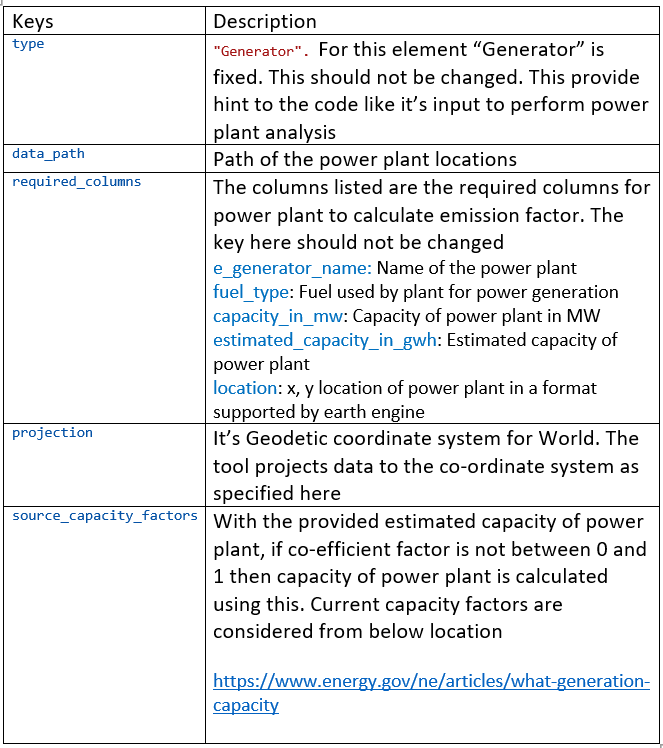


<font color="blue" size="5"> sentinel-5P: </font>
<br />
<br />
	This element is used to provide input to model that explain what are the emissions and bands that need to be considered for analysis. This element contains below elements to make the code execution dynamic. For this analysis, we configured only NO2 emissions as Kaggle provided, in future to add CO emissions for analysis purpose just append another similar node as below in config, the code execution will consider CO emissions and provide the report accordingly. The key of the node can be anything, since tool use attribute “type”:” RasterEmission” to identify which node it’s
<br />
<br />
"sentinel-5P": { <br />
        "type": "RasterEmission",<br />
        "concatType": "sum",<br />
        "data_Path":"\\Kaggle\\ds4g-environmental-insights\\data\\eie_data\\s5p_no2\\",<br />
        "file_format":"s5p_no2_%Y%m%d",<br />
        "filename_Start_at": -1,<br />
        "filename_End_at": 16,<br />
        "bandsConsidered": [{<br />
            "band":0,<br />
            "columnName":"NO2_column_number_density",<br />
            "aliasName": "TotVC",<br />
            "emission": true,<br />
            "color": "skyblue",<br />
            "plot": true,<br />
            "train": true,<br />
            "linewidth": 2,<br />
            "description": "Total vertical column of NO2"<br />
        },<br />
        {<br />
            "band":1,<br />
            "columnName":"NO2_slant_column_number_density",<br />
            "aliasName":"NO2_slant",<br />
            "emission": true,<br />
            "color": "purple",<br />
            "plot": true,<br />
            "train": true,<br />
            "linewidth": 2,<br />
            "description":"NO2 slant column density"<br />
        }]<br />
    }

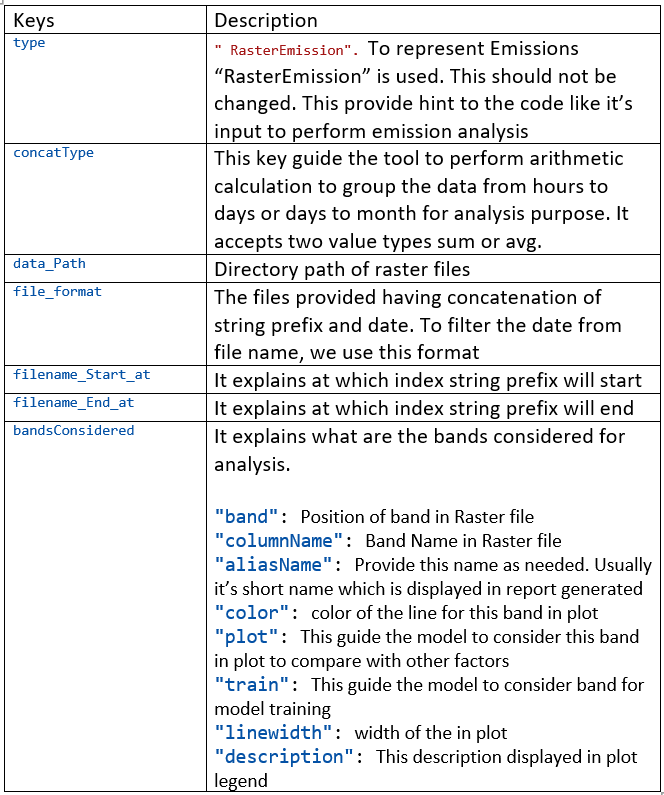

<font size="5" color="blue"> GFS:</font>
<br />
<br />
This element is used to provide input to model that explain what are the weather forecast information and bands that need to be considered for analysis. This element contains below elements to make the code execution dynamic. The key of the node can be anything, since tool use attribute “type”:” RasterWeather” to identify which node it’s
<br />
<br />
"gfs": {<br />
        "type": "RasterWeather",<br />
        "concatType": "average",<br />
        "data_Path":" \\Kaggle\\ds4g-environmental-insights\\data\\eie_data\\gfs_single\\",<br />
        "file_format": "gfs_%Y%m%d%H.tif",  <br />   
        "filename_Start_at": -1,<br />
        "filename_End_at": -1, <br />  
        "bandsConsidered": [{<br />
            "band":0,<br />
            "columnName":"temperature_2m_above_ground",<br />
            "aliasName":"temp_2m_ag",<br />
            "color": "navy",<br />
            "plot": true,<br />
            "train": true,<br />
            "linewidth": 2,<br />
            "description":"Temperature 2m above ground" <br />                       
        }]<br />
}<br />
<br />

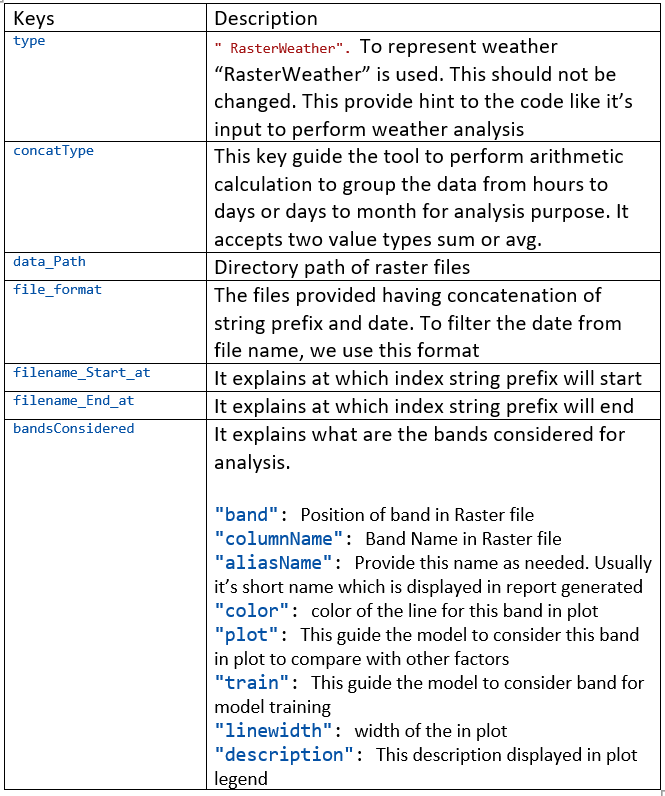

<font size="5" color="blue"> GLDAS: </font>
<br />
<br />
	This element is used to provide input to model that explain what are the ground-based observational data products and bands that need to be considered for analysis. This element contains below elements to make the code execution dynamic. The key of the node can be anything, since tool use attribute “type”:” RasterWeather” to identify which node it’s
<br />
<br />
"gldas":{<br />
        "type":"RasterWeather",<br />
        "concatType":"average",<br />
        "data_Path":"\\Kaggle\\ds4g-environmental-insights\\data\\eie_data\\gldas_single\\",<br />
        "file_format":"gldas_%Y%m%d_%H%M.tif",<br />
        "filename_Start_at":-1,<br />
        "filename_End_at": -1,<br />
        "bandsConsidered":[{<br />
            "band":0,<br />
            "columnName":"LWdown_f_tavg",<br />
            "aliasName":"lwDown",<br />
            "color": "gray",<br />
            "plot": false,<br />
            "train":false,<br />
            "linewidth": 2,<br />
            "description":"Downward long-wave radiation flux"<br />
        }]<br />
}<br />

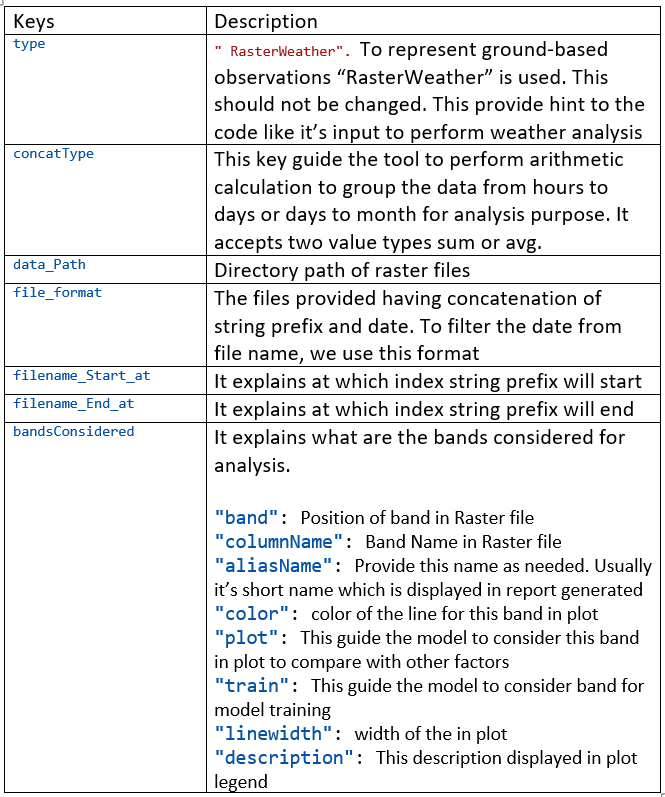